### 2.	Using the "Marketing Customer Value Analysis" dataset, complete the following tasks with proper analysis and interpretation:[In Python & R]
  

###  i.	Load the dataset and explore its structure using basic commands.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

import os

In [2]:
market_df = pd.read_csv("D:\PYTHON\DATA SCIENCE\DATA\WA_Fn-UseC_-Marketing-Customer-Value-Analysis (1).csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\AJITH N\AppData\Local\Temp\ipykernel_14680\144760901.py:1: SyntaxWarning: invalid escape sequence '\P'
  market_df = pd.read_csv("D:\PYTHON\DATA SCIENCE\DATA\WA_Fn-UseC_-Marketing-Customer-Value-Analysis (1).csv")


In [3]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
market_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
market_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Interpretation:
The `head()` function displays the first five records of the dataset by default.  
The `describe()` function provides statistical summaries like count, mean, standard deviation, min, and max for numerical columns.

### ii.	Create a new column named "Engaged" by transforming the categorical values in the "Response" variable into numerical values. Why is this transformation important?

In [6]:
market_df['Engaged'] = market_df['Response'].map({'Yes': 1, 'No': 0})

### Interpretation:
Creating the "Engaged" column converts "Response" values ('Yes' to 1, 'No' to 0), making them numeric. This improves compatibility with tools and models.

### iii.	Calculate and interpret the Engagement Rate. How is it computed, and what does it indicate about the customer responses?

In [7]:
engagement_rate = market_df['Engaged'].mean()
print(f"Engagement Rate: {engagement_rate:.2%}")

Engagement Rate: 14.32%


### Interpretation:
The Engagement Rate of 14.32% means that only 14.32% of customers responded positively ("Yes"). This suggests that customer engagement is relatively low, indicating potential areas for improvement in marketing strategies to boost interactions and responses.

### iv.	Analyze engagement rate by "Renew Offer Type" and "Sales Channel":

In [8]:
renew_offer_engagement = market_df.groupby('Renew Offer Type')['Engaged'].mean()
renew_offer_engagement

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4    0.000000
Name: Engaged, dtype: float64

In [9]:
sales_channel_engagement = market_df.groupby('Sales Channel')['Engaged'].mean()
sales_channel_engagement

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Engaged, dtype: float64

### Interpretation:
1. Engagement by Renew Offer Type:
Offer 2 (23.38%) has the highest engagement, making it the most effective.
Offer 1 (15.83%) performs well but is less effective than Offer 2.
Offer 3 (2.10%) has low engagement, while Offer 4 (0%) is completely ineffective.
2. Engagement by Sales Channel:
Agents (19.15%) drive the highest engagement, highlighting the power of personal interaction.
Branches (11.45%), Web (11.77%), and Call Centers (10.88%) show lower engagement, needing improvements.

### v.	Use a pivot table to summarize engagement by "Renew Offer Type" and visualize the results using both bar and pie charts. Why are these visualizations helpful in understanding customer engagement patterns? 

In [10]:
import matplotlib.pyplot as plt

pivot_table = market_df.pivot_table(values='Engaged', index='Renew Offer Type', aggfunc='mean')
pivot_table



,Engaged
Renew Offer Type,
Offer1,0.158316
Offer2,0.233766
Offer3,0.020950
Offer4,0.000000


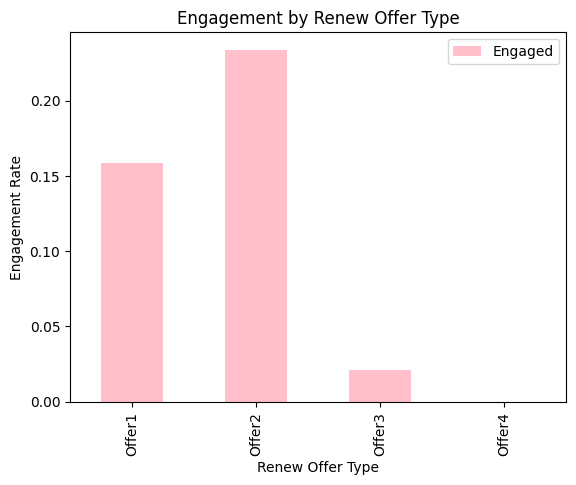

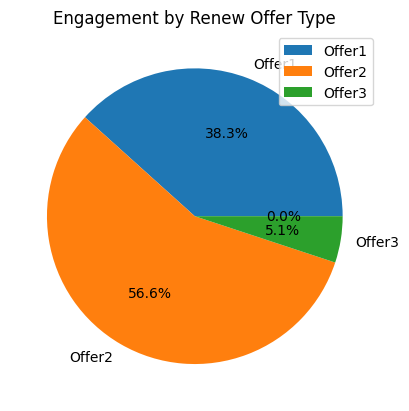

In [11]:
# Bar chart
pivot_table.plot(kind='bar', color='pink')
plt.title("Engagement by Renew Offer Type")
plt.ylabel("Engagement Rate")
plt.show()

# Pie chart
pivot_table.plot(kind='pie', subplots=True, autopct='%1.1f%%')
plt.title("Engagement by Renew Offer Type")
plt.ylabel("")
plt.show()

### Interpretation:
The bar chart compares engagement rates across "Renew Offer Types," highlighting the best performers. The pie chart shows each offer's percentage share of total engagement, illustrating their relative impact.

### vi.	Explain the purpose of regression analysis in this context. Describe how you would approach regression using (i) continuous variables only, (ii) categorical variables, and (iii) both continuous and categorical variables. How would you interpret the outputs for each approach?



(i)Continuous Variables

In [12]:
market_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [13]:
list(market_df.columns)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Engaged']

In [14]:
continous_vars =['Customer Lifetime Value','Income','Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies','Total Claim Amount']

In [16]:
# Initialize the logistic regression model
logit=sm.Logit(market_df['Engaged'],market_df[continous_vars])

# Fit the model
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [17]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                -0.02546
Time:                        20:39:41   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

### Interpretation: 
The logistic regression model shows that factors like Income, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, and Number of Policies significantly decrease the likelihood of customer engagement. On the other hand, Customer Lifetime Value and Total Claim Amount do not significantly affect engagement. Generally, higher premiums, more complaints, and longer periods since claims or policy inception are associated with lower engagement.

### (ii) Categorical

In [28]:
gender_values, gender_lables = market_df['Gender'].factorize()
market_df['genderfactorized'] = gender_values

In [29]:
edu_values, edu_lables = market_df['Education'].factorize()
market_df['educationfactorized'] = edu_values

In [30]:
categorical_vars = ['genderFactorized','educationfactorized']

In [33]:
logit = sm.Logit(
    market_df['Engaged'],
    market_df[['genderfactorized','educationfactorized']]
)
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.489140
         Iterations 6


In [34]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                 -0.1909
Time:                        20:50:59   Log-Likelihood:                -4467.8
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
genderfactorized       -1.1269      0.046    -24.263      0.000      -1.218      -1.036
educationfactorized    -0.5536      0.018    -30.560      0.000      -0.589      -0.518
=======================================================================================
"""

### Interpretation:
The logistic regression results show that both **gender** and **education** significantly reduce the likelihood of engagement, with **p-values** of 0.000. The negative coefficients for both variables (**-1.1269** for gender and **-0.5536** for education) suggest that changes in gender and higher education levels are associated with lower engagement.

### (iii).Both Continous and Categorical

In [35]:
logit11 = sm.Logit(
    market_df['Engaged'],
    market_df[[
        'genderfactorized',
        'educationfactorized',
        'Customer Lifetime Value',
        'Income',
        'Monthly Premium Auto',
        'Months Since Last Claim',
        'Months Since Policy Inception',
        'Number of Open Complaints',
        'Number of Policies',
        'Total Claim Amount'
    ]]
)
logit11_fit = logit11.fit()

Optimization terminated successfully.
         Current function value: 0.420108
         Iterations 6


In [37]:
logit11_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                -0.02283
Time:                        20:53:47   Log-Likelihood:                -3837.3
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
genderfactorized                 -0.1421      0.058     -2.458      0.014      -0.255      -0.029
educationfactorized              -0.0801      0.022     -3.570      0.000      -0.124      -0.036
Customer Lifetime Value       -6.625e-06   5.02e-06     -1.319      0.187   -1.65e-05    3.22e-06
Income                        -2.275e-06   1.04e-06     -2.188      0.029   -4.31e-06   -2.37e-07
Monthly Premium Auto             -0.0077      0.001     -6.343      0.000      -0.010      -0.005
Months Since Last Claim          -0.0186      0.003     -6.627      0.000      -0.024      -0.013
Months Since Policy Inception    -0.0054      0.001     -5.559      0.000      -0.007      -0.004
Number of Open Complaints        -0.0811      0.034     -2.375      0.018      -0.148      -0.014
Number of Policies               -0.0751      0.013     -5.888      0.000      -0.100      -0.050
Total Claim Amount                0.0002      0.000      1.173      0.241      -0.000       0.000
=================================================================================================
"""

### Interpretation:
Both numeric and categorical variables are combined to create a comprehensive model. Continuous variables show direct effects on the outcome, while categorical variables are interpreted relative to a reference category.